In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv("./logbook_assignment1.csv")

/tmp/ipykernel_1947409/2813455951.py:1: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./logbook_assignment1.csv")


In [61]:
date_fueled = df["date_fueled"]
df["date_fueled"] = pd.to_datetime(df["date_fueled"], errors='coerce')
df["date_fueled"]

/tmp/ipykernel_1947409/3711806637.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date_fueled"] = pd.to_datetime(df["date_fueled"], errors='coerce')
/tmp/ipykernel_1947409/3711806637.py:2: FutureWarning: Parsed string "11:45H
185.7" included an un-recognized timezone "H". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df["date_fueled"] = pd.to_datetime(df["date_fueled"], errors='coerce')
/tmp/ipykernel_1947409/3711806637.py:2: FutureWarning: Parsed string "11:43H
278.1" included an un-recognized timezone "H". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df

0                NaT
1         2012-11-07
2         2012-09-22
3         2019-05-04
4         2022-02-15
             ...    
1174865   2020-02-19
1174866   2019-12-06
1174867   2021-10-04
1174868   2021-07-26
1174869   2019-03-12
Name: date_fueled, Length: 1174870, dtype: datetime64[ns]

# 1

## 1.1

### 1
Identify what percentage of date_fueled entries that are not proper dates.

In [62]:
totalnumrows = len(df["date_fueled"])
invalid_row_count=int(df["date_fueled"].isna().sum())

percentage = (invalid_row_count/totalnumrows)*100
print(f"The percentage is {percentage} % ")

The percentage is 11.65763020589512 % 


### 2
Replace NAT with values from the date captured column

In [63]:
df["date_fueled"] = df["date_fueled"].fillna(df["date_captured"])

### 3.

In [64]:
df["date_fueled"] = pd.to_datetime(df["date_fueled"], errors='coerce')
invalid_row_count=int(df["date_fueled"].isna().sum())
invalid_row_count

0

In [65]:
df = df[(df["date_fueled"] >= "2005-01-01") & (df["date_fueled"] <= pd.Timestamp.today())]
df

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,2022-04-07,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,2012-11-07,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,2022-02-15,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...
...,...,...,...,...,...,...,...,...,...
1174865,2020-02-19,Feb 19 2020,"118,237",13.046,$1.999,$26.08,25.7,NaN,https://www.somewebsite.com/volkswagen/beetle/...
1174866,2019-12-06,Dec 6 2019,"141,761",12.637,$2.449,$30.95,20.0,NaN,https://www.somewebsite.com/toyota/avalon/2000...
1174867,2021-10-04,Oct 4 2021,"65,029",10.002,$3.449,$34.50,28.5,NaN,https://www.somewebsite.com/fiat/500/2013/909694
1174868,2021-07-26,Jul 26 2021,"15,255",10.493,$3.539,$37.13,36.5,NaN,https://www.somewebsite.com/mini/cooper/2019/9...


### Plot the distribution of fueling dates.

The first fueling appears from 2005 onward, which matches the lower bound. From 2005 to around 2015 the number of fueling records graws gradually year by year.

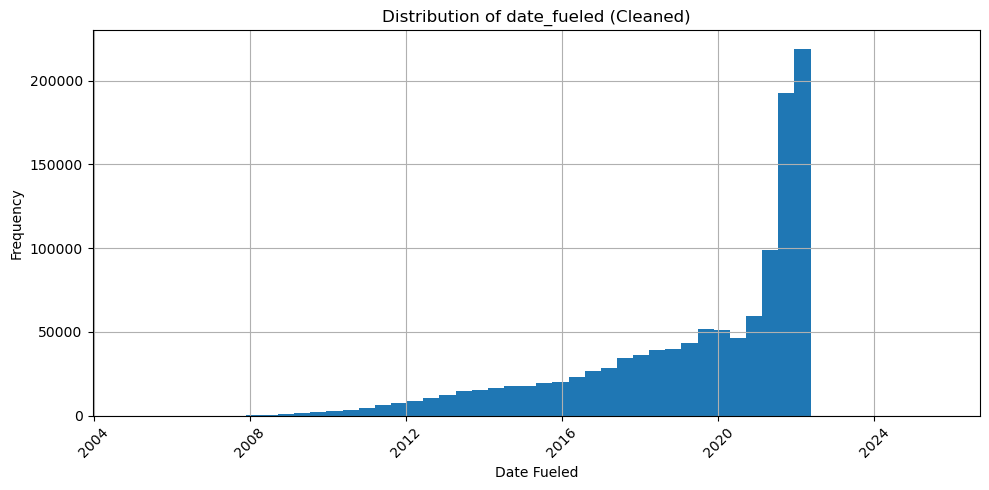

In [66]:
df["date_fueled"].dropna().hist(bins=50, figsize=(10,5))
plt.xlabel("Date Fueled")
plt.ylabel("Frequency")
plt.title("Distribution of date_fueled (Cleaned)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 1.2: Numeric Fields

## 1. Percentage of gallons, miles and odometer entries that are missing

In [67]:
missing_galons=int(df["gallons"].isna().sum())
num_galons = len(df["gallons"])
missing_galon_percentage = (missing_galons/num_galons)*100
print(f"Percentage of missing galons :  {missing_galon_percentage}%")

Percentage of missing galons :  6.316969285578623%


In [68]:
missing_miles=int(df["miles"].isna().sum())
num_miles = len(df["miles"])
missing_miles_percentage = (missing_miles/num_galons)*100
print(f"Percentage of missing galons :  {missing_miles_percentage}%")

Percentage of missing galons :  87.56084245562067%


In [69]:
missing_odometer=int(df["odometer"].isna().sum())
num_odometer = len(df["odometer"])
missing_odometer_percentage = (missing_odometer/num_odometer)*100
print(f"Percentage of missing galons :  {missing_odometer_percentage}%")

Percentage of missing galons :  12.68444366467684%


### 2. Columns

In [70]:
# Ensure numeric dtype (convert errors to NaN)
df["miles"] = pd.to_numeric(df["miles"], errors="coerce")
df["gallons"] = pd.to_numeric(df["gallons"], errors="coerce")
df["mpg"] = pd.to_numeric(df["mpg"], errors="coerce")

In [71]:
# Fill mpg where missing
mask = df["mpg"].isna() & df["miles"].notna() & df["gallons"].notna() & (df["gallons"] != 0)
df.loc[mask, "mpg"] = df.loc[mask, "miles"] / df.loc[mask, "gallons"]

# Fill miles where missing
mask = df["miles"].isna() & df["mpg"].notna() & df["gallons"].notna()
df.loc[mask, "miles"] = df.loc[mask, "mpg"] * df.loc[mask, "gallons"]

# Fill gallons where missing
mask = df["gallons"].isna() & df["miles"].notna() & df["mpg"].notna() & (df["mpg"] != 0)
df.loc[mask, "gallons"] = df.loc[mask, "miles"] / df.loc[mask, "mpg"]

In [73]:
df[["miles", "gallons", "mpg"]] = df.apply(fill_values, axis=1)

In [74]:
df

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,2022-04-07,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,2012-11-07,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233
4,2022-02-15,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4000,https://www.somewebsite.com/honda/passport/201...
...,...,...,...,...,...,...,...,...,...
1174865,2020-02-19,Feb 19 2020,"118,237",13.046,$1.999,$26.08,25.7,335.2822,https://www.somewebsite.com/volkswagen/beetle/...
1174866,2019-12-06,Dec 6 2019,"141,761",12.637,$2.449,$30.95,20.0,252.7400,https://www.somewebsite.com/toyota/avalon/2000...
1174867,2021-10-04,Oct 4 2021,"65,029",10.002,$3.449,$34.50,28.5,285.0570,https://www.somewebsite.com/fiat/500/2013/909694
1174868,2021-07-26,Jul 26 2021,"15,255",10.493,$3.539,$37.13,36.5,382.9945,https://www.somewebsite.com/mini/cooper/2019/9...


### 4.

#### Miles
- Likely right skewed because most trips are short, but some very long trips create a heavy tail.

#### Gallons
- Also right skewed as most fuel ups are small to moderate, with a few large refuels.

#### MPG
- Miles per Gallon, clusters around a central value.

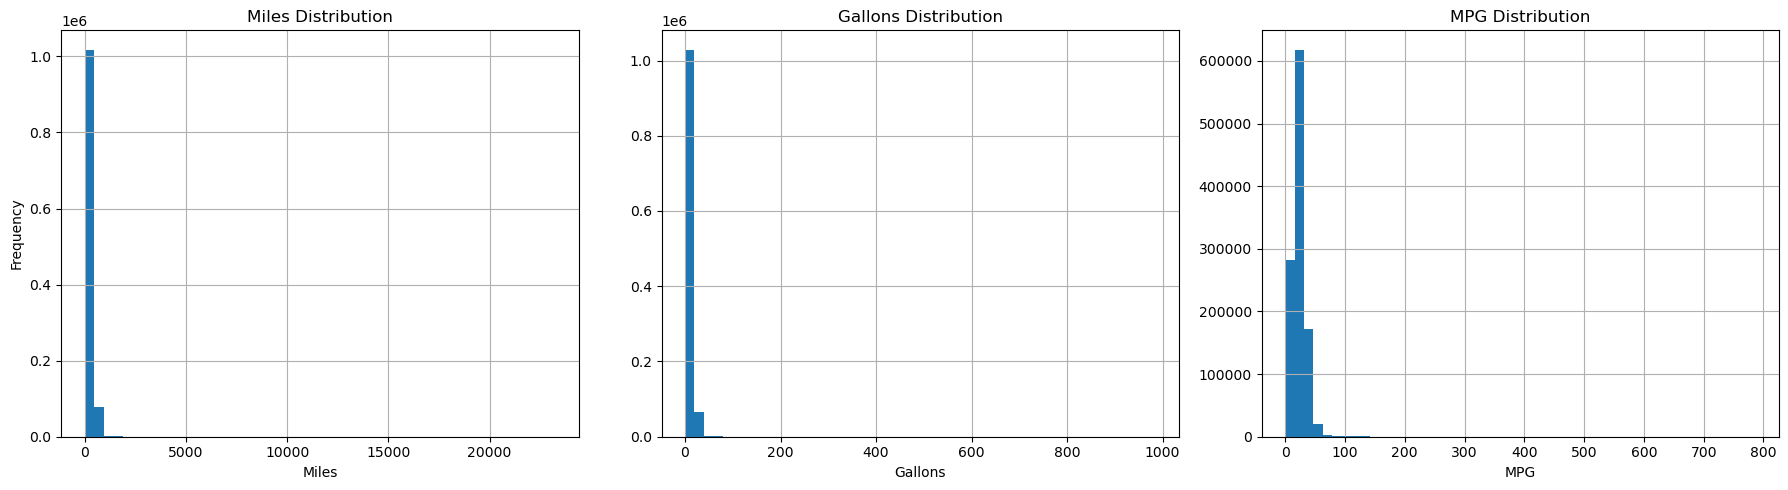

In [75]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

df["miles"].dropna().hist(bins=50, ax=axes[0])
axes[0].set_title("Miles Distribution")
axes[0].set_xlabel("Miles")
axes[0].set_ylabel("Frequency")

df["gallons"].dropna().hist(bins=50, ax=axes[1])
axes[1].set_title("Gallons Distribution")
axes[1].set_xlabel("Gallons")

df["mpg"].dropna().hist(bins=50, ax=axes[2])
axes[2].set_title("MPG Distribution")
axes[2].set_xlabel("MPG")

plt.tight_layout()
plt.show()


### 5.
Mean, standard deviation, max, min, most frequent and quartiles.

In [77]:
df["miles"] = pd.to_numeric(df["miles"], errors="coerce")
df["gallons"] = pd.to_numeric(df["gallons"], errors="coerce")
df["mpg"] = pd.to_numeric(df["mpg"], errors="coerce")

stats = df[["miles", "gallons", "mpg"]].describe(include="all").T

stats["mode"] = df[["miles", "gallons", "mpg"]].mode().iloc[0]

stats


,count,mean,std,min,25%,50%,75%,max,mode
miles,1099903.0,264.517662,190.683841,0.0,181.34315,267.015,342.7104,23238.40,0.000
gallons,1099906.0,12.381489,6.740266,0.0,8.99000,11.954,14.9380,984.71,10.567
mpg,1099966.0,22.159632,15.639106,0.0,15.60000,21.800,28.5000,786.50,0.000
